Sample Mean: -0.07035252625432538
Sample Standard Deviation: 1.2734183525733556


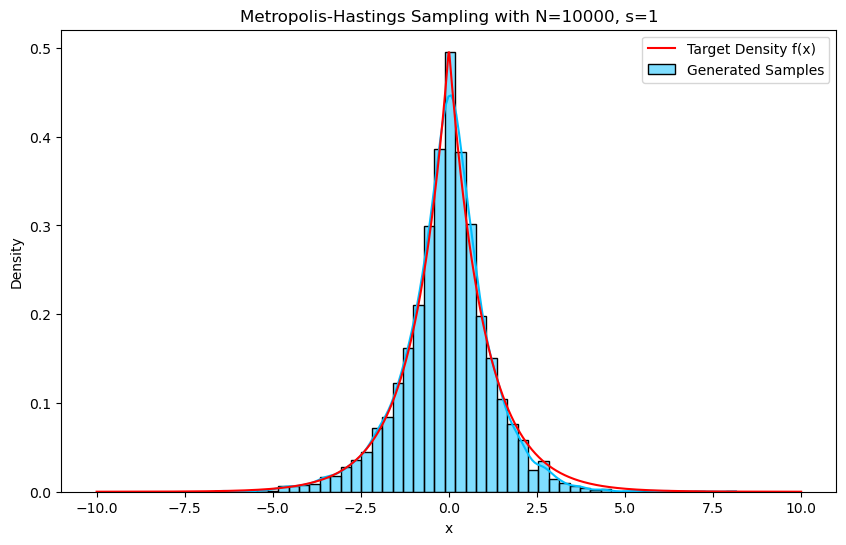

In [3]:
#import libraries required
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set initial parameters x0 and N
N = 10000
s = 1
x0 = 0

# Define target density function and its log for stability
def f(x):
    return 0.5 * np.exp(-np.abs(x))

def log_f(x):
    return -np.abs(x) - np.log(2)

# Metropolis-Hastings algorithm
samples = [x0]
for i in range(1, N):
    # Propose new sample 
    x_star = np.random.normal(samples[-1], s)
    # Calculate acceptance ratio
    log_r = log_f(x_star) - log_f(samples[-1])
    # Accept or reject
    if np.log(np.random.uniform()) < log_r:
        samples.append(x_star)
    else:
        samples.append(samples[-1])

# Convert samples to numpy array for analysis
samples = np.array(samples)

# Monte Carlo estimates
sample_mean = np.mean(samples)
sample_std = np.std(samples)
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")

# Plotting histogram
x = np.linspace(-10, 10, 1000)
f_x = f(x)

plt.figure(figsize=(10, 6))
sns.histplot(samples, bins=50, kde=True, color='deepskyblue', stat='density', label="Generated Samples")
plt.plot(x, f_x, color='red', label="Target Density f(x)")

plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.title("Metropolis-Hastings Sampling with N=10000, s=1")
plt.show()


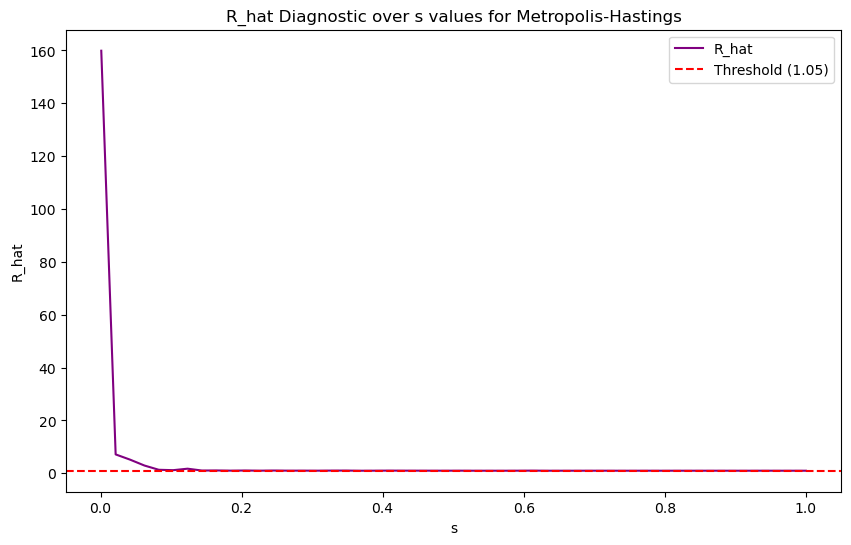

In [4]:
# Parameters for part (b)
N = 2000
s_values = np.linspace(0.001, 1, 50)
J = 4

def log_f(x):
    return -np.abs(x) - np.log(2)
def metropolis_chain(x0, N, s):
  
    samples = [x0]
    for i in range(1, N):
        x_star = np.random.normal(samples[-1], s)
        log_r = log_f(x_star) - log_f(samples[-1])
        if np.log(np.random.uniform()) < log_r:
            samples.append(x_star)
        else:
            samples.append(samples[-1])
    return np.array(samples)

# Generate chains and calculate R_hat for different values of s
R_hat_values = []
for s in s_values:
    chains = [metropolis_chain(x0=np.random.uniform(-5, 5), N=N, s=s) for _ in range(J)]
    
    # Calculate M_j (mean of each chain) and V_j (variance of each chain)
    M_j = np.array([np.mean(chain) for chain in chains])
    V_j = np.array([np.var(chain, ddof=1) for chain in chains])
    
    # Calculate W (within-chain variance)
    W = np.mean(V_j)
    
    # Calculate M (overall mean) and B (between-chain variance)
    M = np.mean(M_j)
    B = np.var(M_j, ddof=1)
    
    # Compute R_hat
    R_hat = np.sqrt((B + W) / W)
    R_hat_values.append(R_hat)

# Plotting R_hat over different values of s
plt.figure(figsize=(10, 6))
plt.plot(s_values, R_hat_values, label="R_hat", color='purple')
plt.axhline(1.05, color='red', linestyle='--', label="Threshold (1.05)")
plt.xlabel("s")
plt.ylabel("R_hat")
plt.legend()
plt.title("R_hat Diagnostic over s values for Metropolis-Hastings")
plt.show()
